In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [353]:
df = pd.read_excel(r"C:\Users\AVS\Downloads\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [355]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [356]:
#Check for null data
null_data = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null_data

,Null Values,Percentage Null Values
Airline,0,0.000000
Date_of_Journey,0,0.000000
Source,0,0.000000
Destination,0,0.000000
Route,1,0.009361
Dep_Time,0,0.000000
Arrival_Time,0,0.000000
Duration,0,0.000000
Total_Stops,1,0.009361
Additional_Info,0,0.000000


In [357]:
df.dropna(inplace=True)

In [358]:
null_data = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null_data

,Null Values,Percentage Null Values
Airline,0,0.0
Date_of_Journey,0,0.0
Source,0,0.0
Destination,0,0.0
Route,0,0.0
Dep_Time,0,0.0
Arrival_Time,0,0.0
Duration,0,0.0
Total_Stops,0,0.0
Additional_Info,0,0.0


From description we can see that Date_of_Journey is a object data type,¶
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
model will not be able to understand Theses string values,it just understand Time-stamp For this we require pandas to_datetime to convert object data type to datetime dtype.

dt.day method will extract only day of that date

dt.month method will extract only month of that date

In [360]:
def change_into_datetime(col):
         df[col]=pd.to_datetime(df[col])

In [361]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [362]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [363]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [364]:
df['Journey_day']=df['Date_of_Journey'].dt.day
df['Journey_month']=df['Date_of_Journey'].dt.month

In [365]:
df.drop('Date_of_Journey', axis=1, inplace=True)

Defining functions extract values from [Dep_Time , Arrival_Time] columns and drop any column¶


In [367]:
# Add departure hour column
df["Dep_Time"+"_hour"] = df["Dep_Time"].dt.hour

# Add departure minute column
df["Dep_Time"+"_minute"] = df["Dep_Time"].dt.minute

In [368]:
#Drop Dep_Time column after conversion
df.drop("Dep_Time",axis=1,inplace=True)

In [369]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-17 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-10-17 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-10-17 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50


In [370]:
# Convert Arrival_Time from timestamp into hour and minute

#Add Arrival_Time hour column
df["Arrival_Time"+"_hour"] = df["Arrival_Time"].dt.hour

#Add Arrival_Time minute column
df["Arrival_Time"+"_minute"] = df["Arrival_Time"].dt.minute

#Drop Arrival_Time column
df.drop("Arrival_Time", axis = 1, inplace = True)

In [371]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35






Preprocessing on "Duration" column to separate hour and minute.

In [374]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   
            duration[i]=duration[i] + ' 0m'      
        else:
            duration[i]='0h '+ duration[i]       

In [375]:
df['Duration']=duration
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [376]:
# Check for new datatype
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int32
Journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours         object
Duration_mins          object
dtype: object

In [377]:
# Convert column from int32 to int64

columns_to_convert = [
    'Price',
    'Journey_day',
    'Journey_month',
    'Dep_Time_hour',
    'Dep_Time_minute',
    'Arrival_Time_hour',
    'Arrival_Time_minute'
]

# Convert to int64
for column in columns_to_convert:
    df[column] = df[column].astype('int64')

In [378]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

# Extract Numerical and Categorical Features

In [380]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

In [381]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'Duration_hours',
 'Duration_mins']

# Univariate Analysis

### Airline vs Price Analysis

In [384]:
categorical=df[cat_features]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4,45


In [385]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

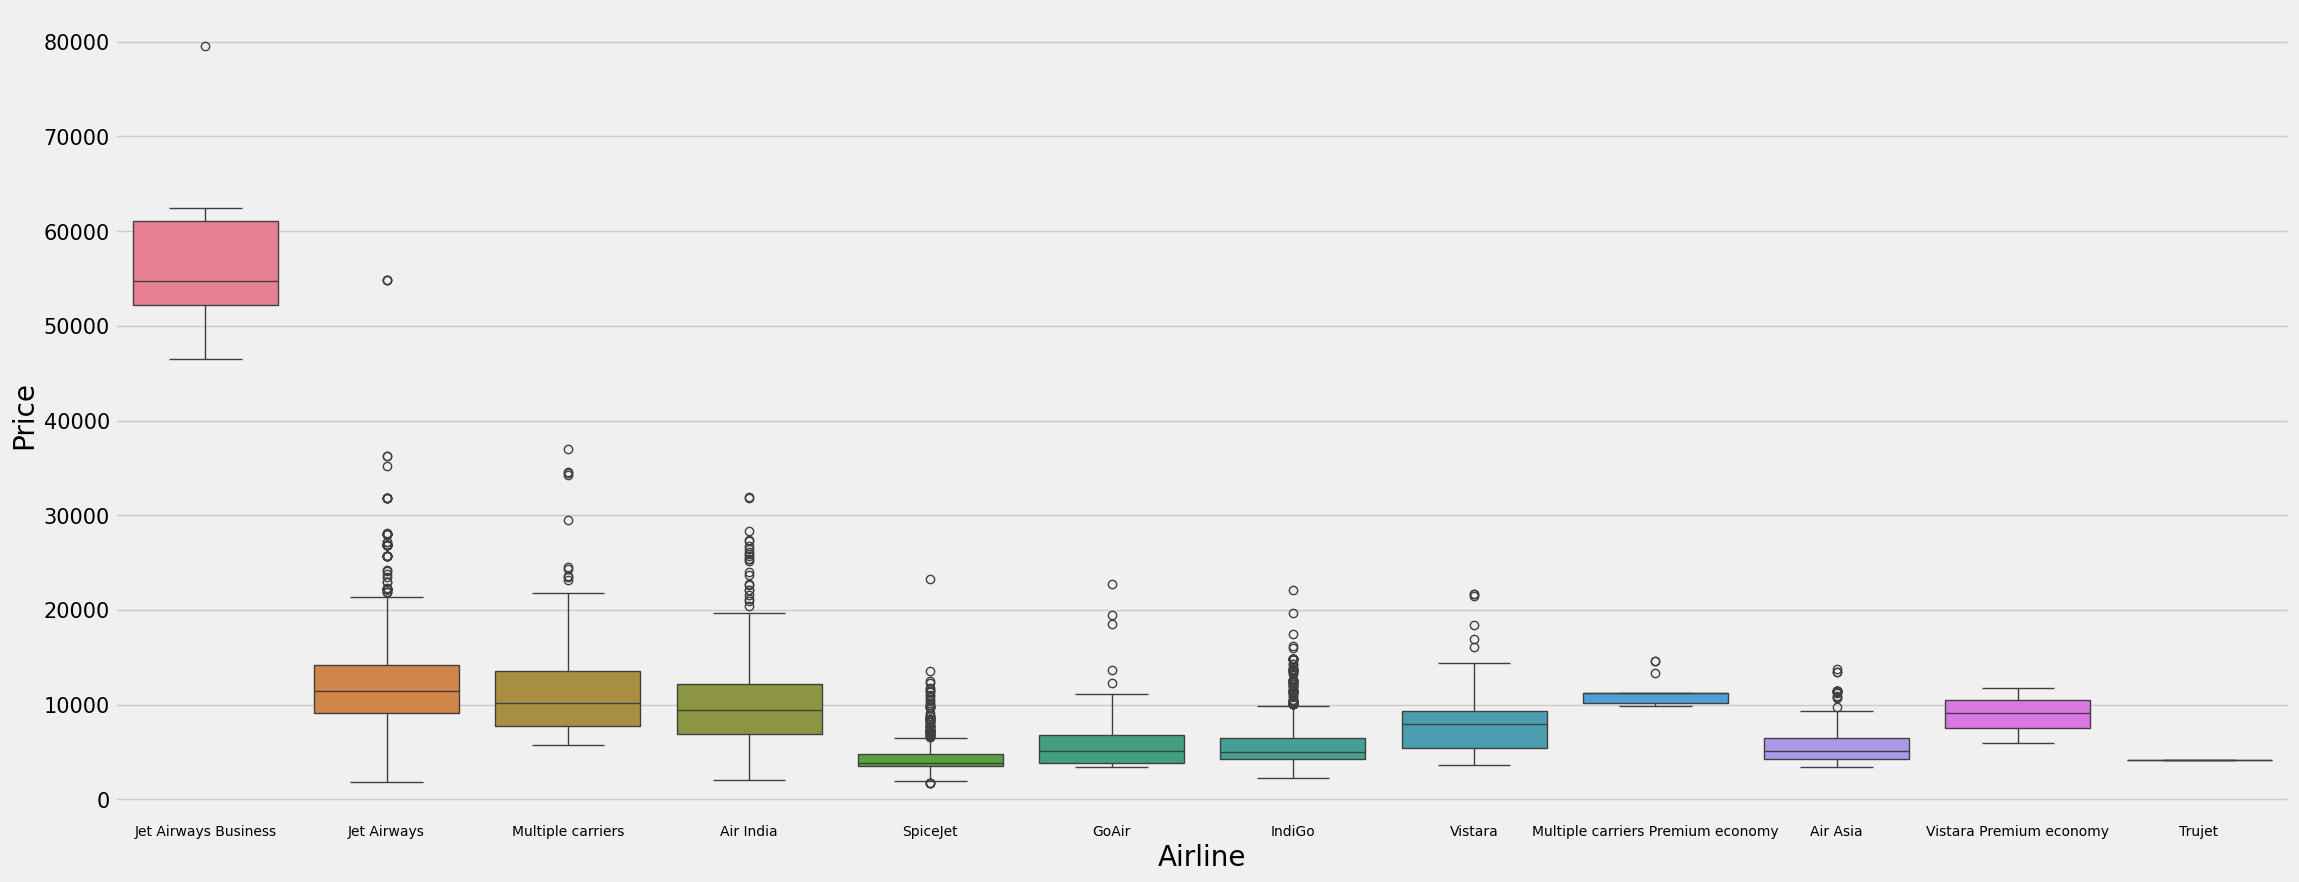

In [386]:
plt.figure(figsize=(25, 10))
colors = sns.color_palette("husl", len(df['Airline'].unique()))
sns.boxplot(y='Price',x='Airline',data = df.sort_values('Price',ascending=False), palette=colors)
plt.xlabel('Airline', fontsize=20)  
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=15)

plt.show()

It is summarized from the graph that all the other airline apart from Jet Airways Business have around the same median. Jet Airways Business have the highest price distribution.

In [388]:
# Encoding Airline Feature

Airline=pd.get_dummies(categorical['Airline'], drop_first=True, dtype = int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source vs Price Analysis

In [390]:
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

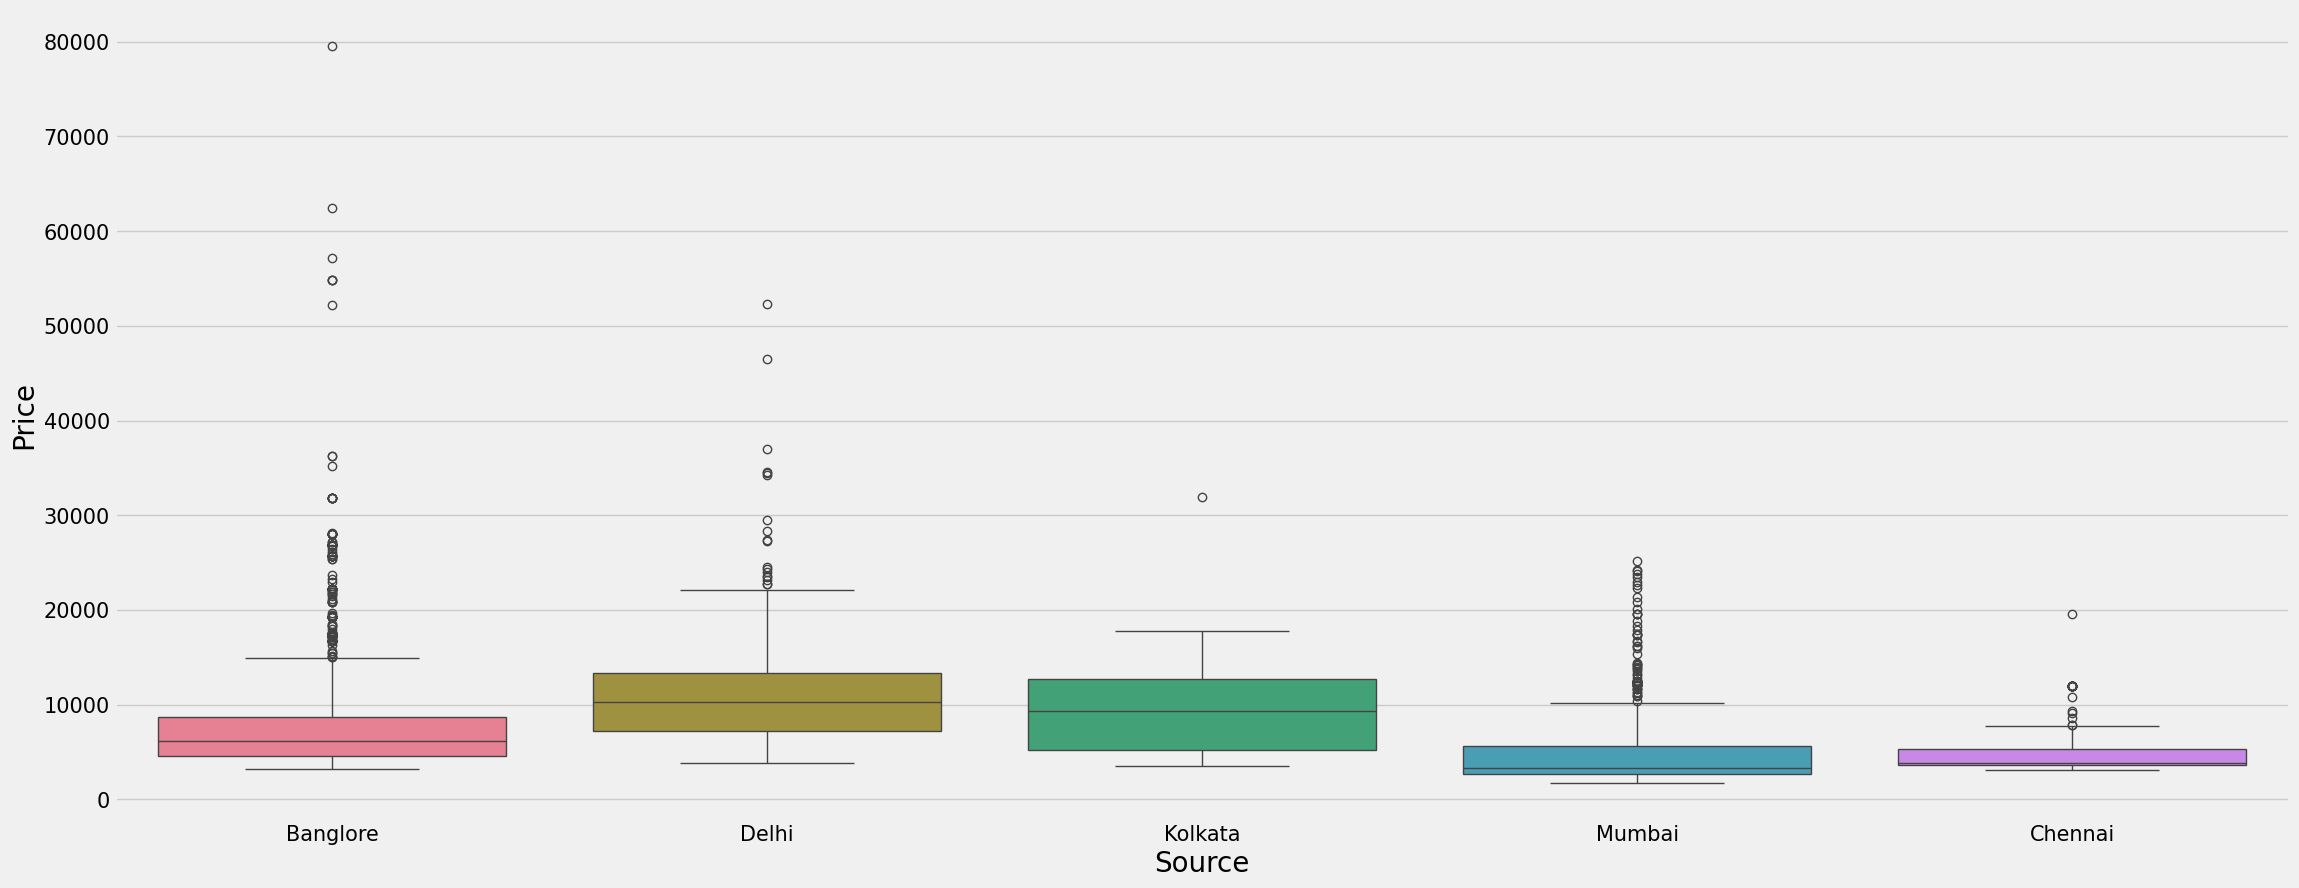

In [391]:
plt.figure(figsize=(25, 10))
colors = sns.color_palette("husl", len(df['Source'].unique()))
sns.boxplot(y='Price',x='Source',data = df.sort_values('Price',ascending=False), palette=colors)
plt.xlabel('Source', fontsize=20)  
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)

plt.show()

It is summarized from the graph that all the sources have similiar price distribution with Banglore having the highest outlier at around 80000.

In [393]:
# Encoding Source Feature

Source=pd.get_dummies(categorical['Source'], drop_first=True, dtype = int)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Destination vs Price Analysis

In [395]:
categorical['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

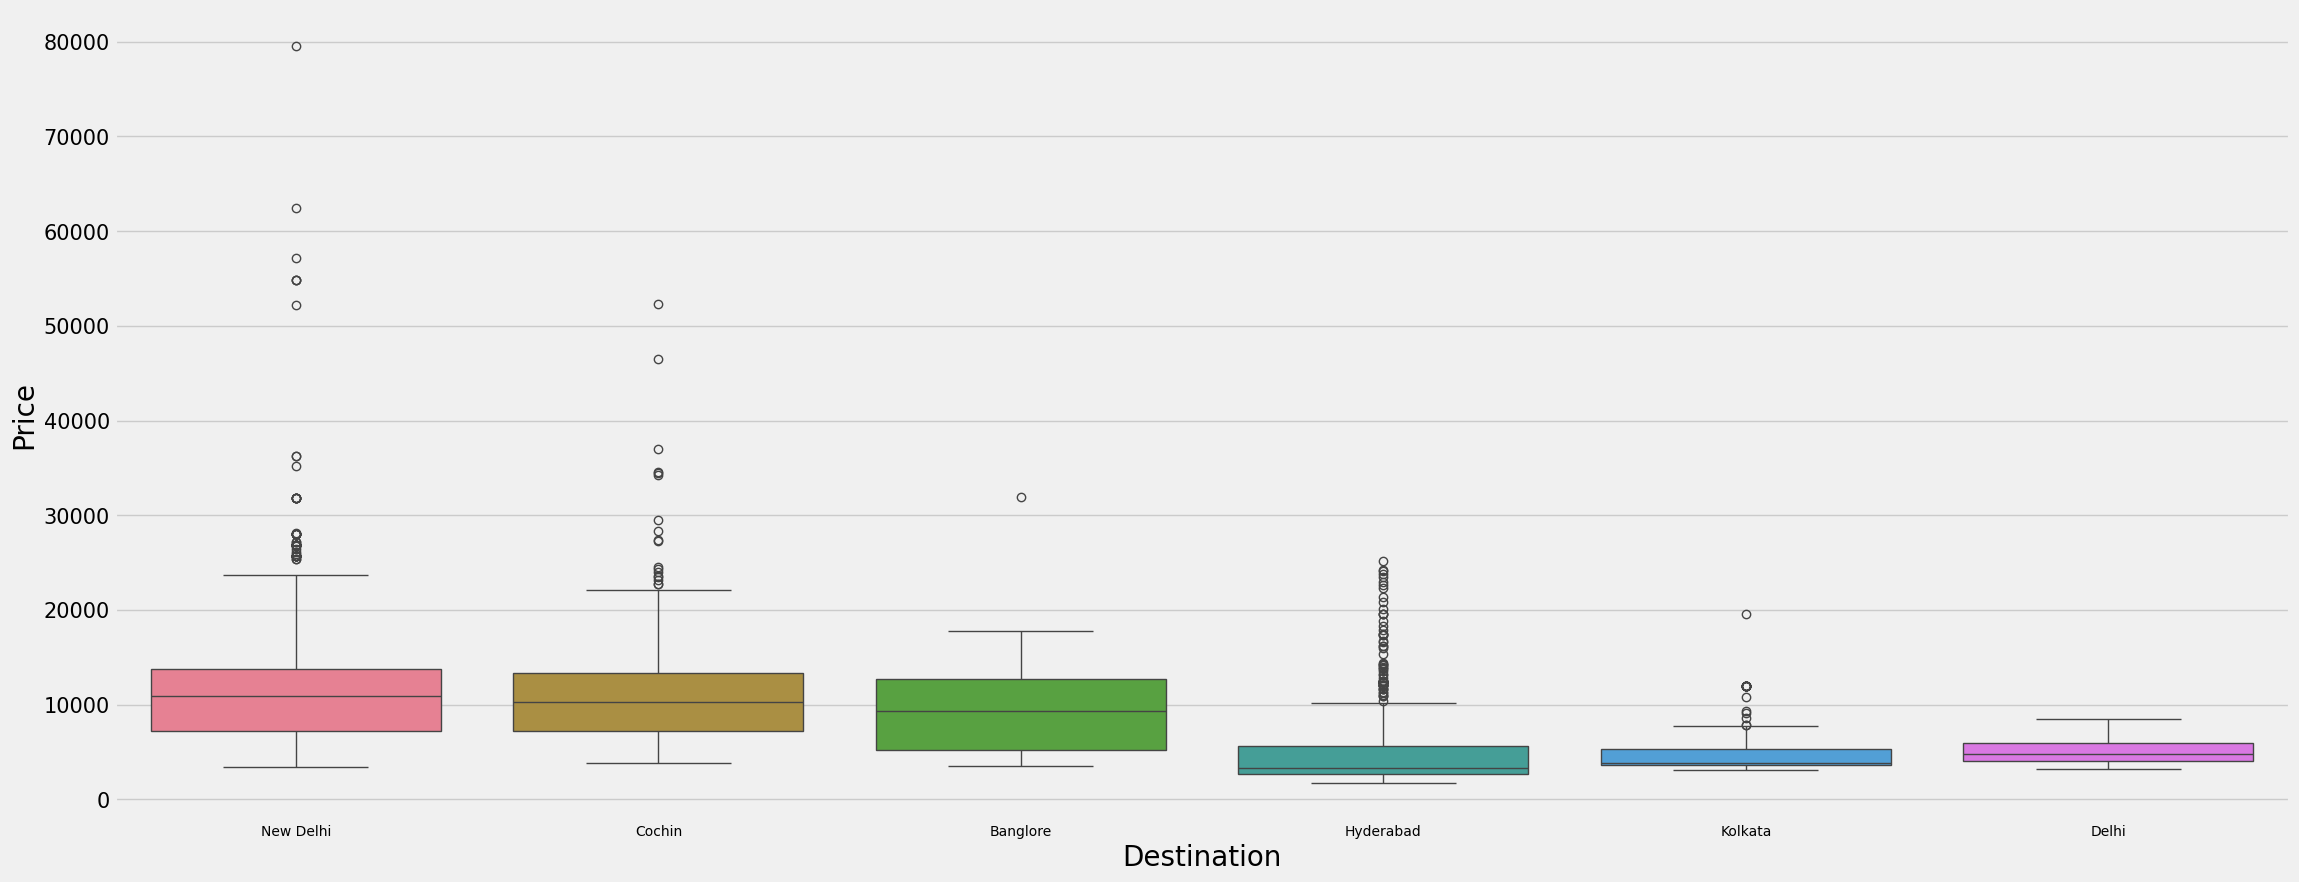

In [396]:
plt.figure(figsize=(25, 10))
colors = sns.color_palette("husl", len(df['Destination'].unique()))
sns.boxplot(y='Price',x='Destination',data = df.sort_values('Price',ascending=False), palette=colors)
plt.xlabel('Destination', fontsize=20)  
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=15)

plt.show()

It is summarized from the graph that the price distributions do not vary that much in respect to the destination.

In [398]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True, dtype = int)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Handling Route Column

In [400]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [401]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [402]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4,45,BLR,NAG,DEL,NaN,NaN


In [403]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [404]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4,45,BLR,NAG,DEL,None,None


In [405]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Duration_hours has total 44 categories 

Duration_mins has total 12 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [406]:
# Label Encoding Route Column

encoder=LabelEncoder()

In [407]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [408]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4,45,0,34,8,13,5


In [409]:
df.drop('Route',axis=1,inplace=True)

In [410]:
df.drop('Additional_Info',axis=1,inplace=True)

In [411]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4,45,0,34,8,13,5


In [412]:
categorical['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [413]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [414]:
# Label Encoding Total Stop

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [415]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [416]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,4,45,0,34,8,13,5


In [417]:
df[num_features]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,3897,24,3,22,20,1,10
1,7662,1,5,5,50,13,15
2,13882,9,6,9,25,4,25
3,6218,12,5,18,5,23,30
4,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25
10679,4145,27,4,20,45,23,20
10680,7229,27,4,8,20,11,20
10681,12648,1,3,11,30,14,10


In [418]:
df = pd.concat([categorical,Airline,Source,Destination,df[num_features]],axis=1)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_mins,Route_1,Route_2,...,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,2,50,0,13,...,0,0,1,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7,25,2,25,...,0,0,0,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,19,0,3,32,...,0,0,0,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,5,25,2,34,...,0,0,0,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,4,45,0,34,...,0,0,1,13302,1,3,16,50,21,35


In [419]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Additional_Info',axis=1,inplace=True)

In [420]:
df.head()

,Total_Stops,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,...,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,2,50,0,13,29,13,5,0,0,...,0,0,1,3897,24,3,22,20,1,10
1,2,7,25,2,25,1,3,5,1,0,...,0,0,0,7662,1,5,5,50,13,15
2,2,19,0,3,32,4,5,5,0,0,...,0,0,0,13882,9,6,9,25,4,25
3,1,5,25,2,34,3,13,5,0,0,...,0,0,0,6218,12,5,18,5,23,30
4,1,4,45,0,34,8,13,5,0,0,...,0,0,1,13302,1,3,16,50,21,35


In [421]:
df.columns

Index(['Total_Stops', 'Duration_hours', 'Duration_mins', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

### Handling Outlier

Rejection 36 points
z-score of 3 corresponds to a prob of 0.01%


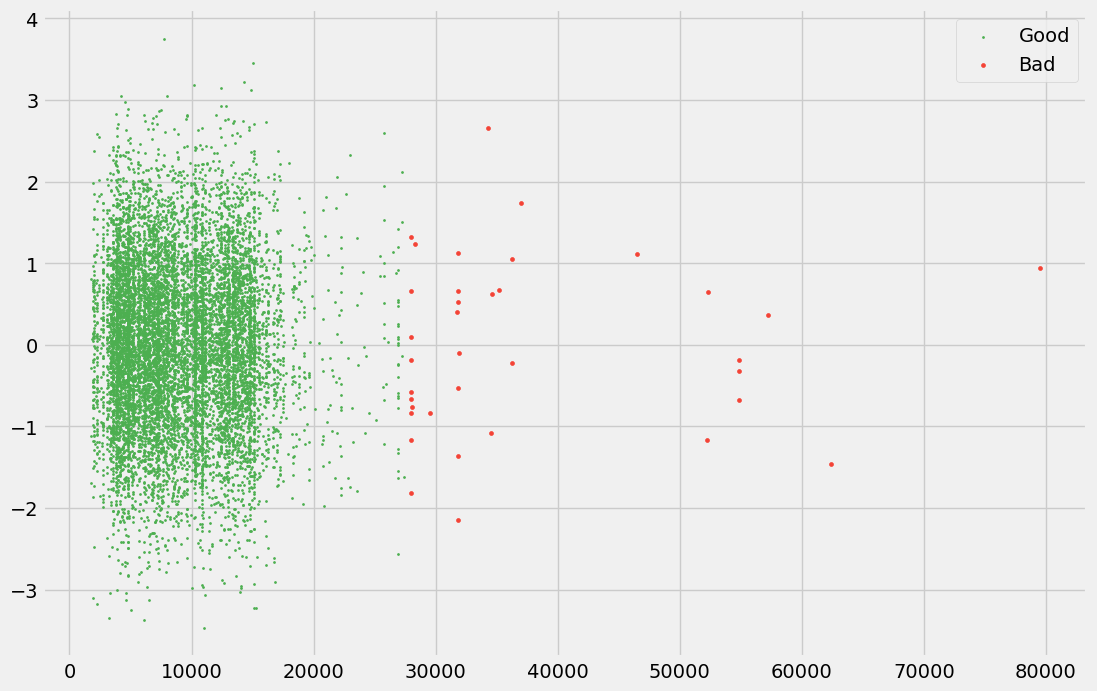

In [423]:
plt.figure(figsize=(12,8))
mean, std = np.mean(df['Price']), np.std(df['Price'])
z_score = np.abs((df['Price'] - mean) / std)
threshold = 4
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df['Price'].size)
plt.scatter(df['Price'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df['Price'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

In [424]:
df['Price']=np.where(df['Price']>=30000,df['Price'].median(),df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

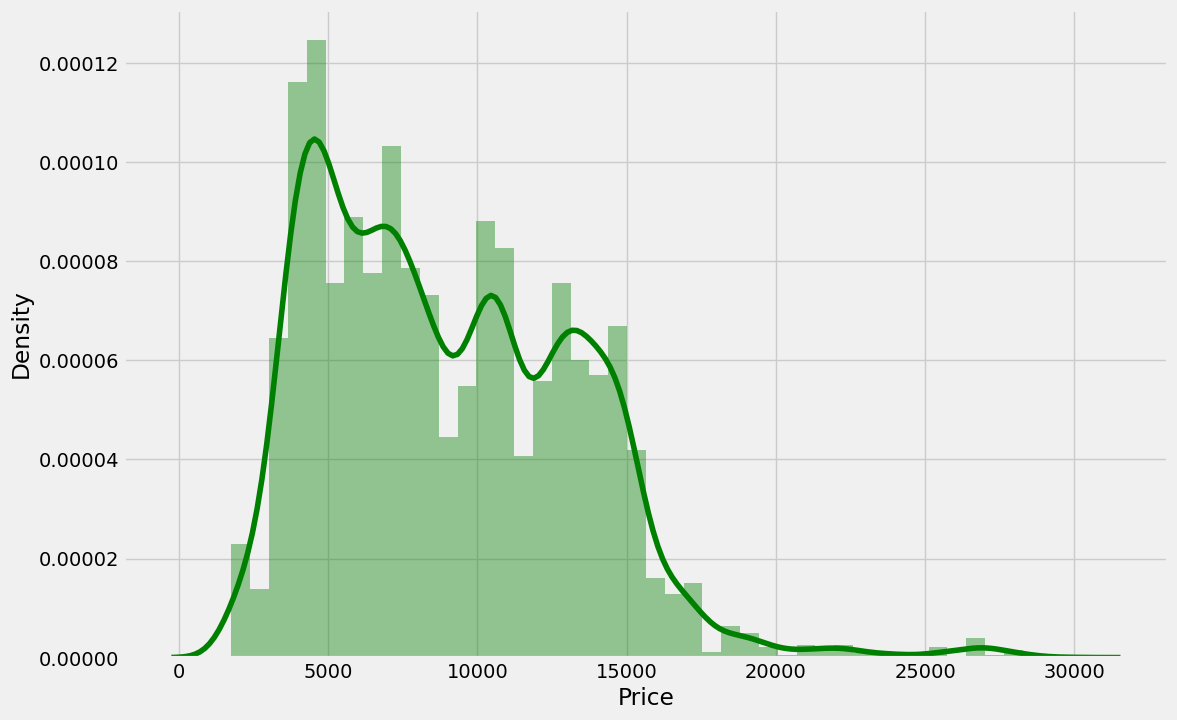

In [425]:
plt.figure(figsize=(12,8))
sns.distplot(df['Price'] ,color= "g")

# Separate Independent and Dependent Feature

In [427]:
X=df.drop('Price',axis=1)
X.head()

,Total_Stops,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,...,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,2,50,0,13,29,13,5,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2,7,25,2,25,1,3,5,1,0,...,0,0,0,0,1,5,5,50,13,15
2,2,19,0,3,32,4,5,5,0,0,...,0,0,0,0,9,6,9,25,4,25
3,1,5,25,2,34,3,13,5,0,0,...,0,0,0,0,12,5,18,5,23,30
4,1,4,45,0,34,8,13,5,0,0,...,0,0,0,1,1,3,16,50,21,35


In [428]:
y=df['Price']

# Feature Selection

In [430]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.2, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.2, random_state=0))

In [431]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True])

In [432]:
cols=X.columns

In [433]:
selected_feat = cols[(feature_sel_model.get_support())]

In [434]:
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 34
selected features: 28


In [435]:
selected_feat

Index(['Total_Stops', 'Duration_hours', 'Duration_mins', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Kolkata', 'Mumbai', 'Hyderabad',
       'New Delhi', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [436]:
x=X[selected_feat]

# Split Dataset Into Train and Test

In [438]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)

In [439]:
#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (8545, 29)
X_test shape is  (2137, 29)
y_train shape is  (8545,)
y_test shape is  (2137,)


# Defining Function for ML Models

In [441]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

# Random Forest Algorithm

Training score : 0.9527536378155572
predictions are: 
 [ 7191.84851429  7733.40656667 11193.4747     ... 10315.27016667
  6748.78503333  6426.03798333]


r2 score: 0.8153327266612878
MAE: 1178.6651443631401
MSE: 3579675.8514428246
RMSE: 1892.003131985469


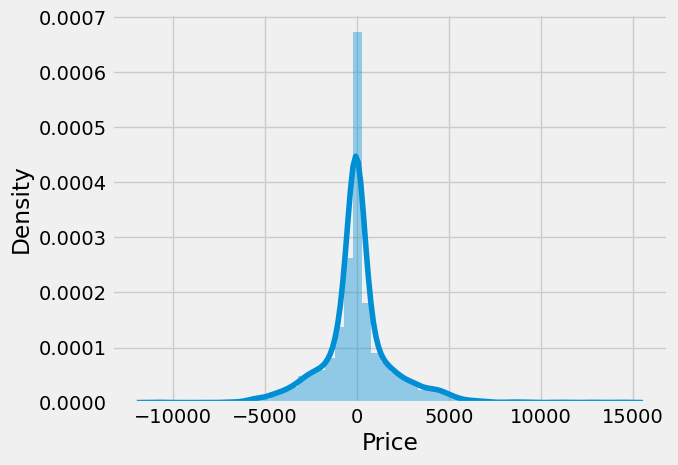

In [443]:
predict(RandomForestRegressor(ccp_alpha=0.2,n_estimators=1000))

# Gradient Boosting

Training score : 0.965861719706669
predictions are: 
 [ 4340.08953553  7196.96181799 12681.         ...  9275.00000225
  7531.99999996  6564.99999951]


r2 score: 0.7216856668688028
MAE: 1331.9776736658657
MSE: 5394973.778558024
RMSE: 2322.7082852906915


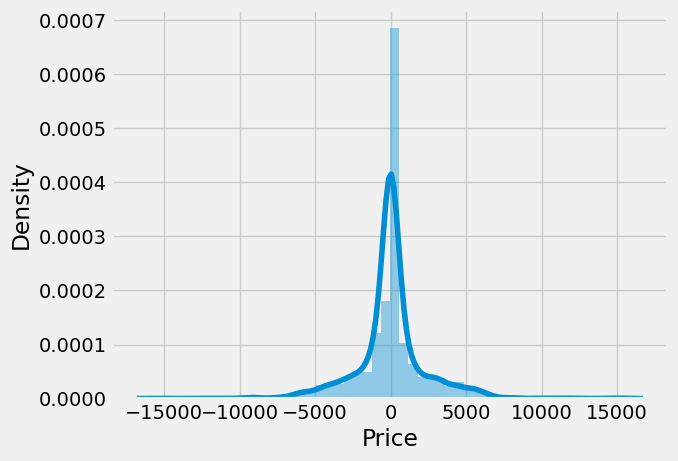

In [445]:
predict(GradientBoostingRegressor(alpha=.3 , n_estimators=320,learning_rate=0.9, max_depth=30))

# Lasso Algorithm

Training score : 0.6382275729478162
predictions are: 
 [ 7379.57211289  9671.2094333  12717.39808809 ... 10613.08263877
  7847.84672129  5903.1666259 ]


r2 score: 0.6011274601781488
MAE: 1967.313389714881
MSE: 7731929.825947272
RMSE: 2780.6347883077474


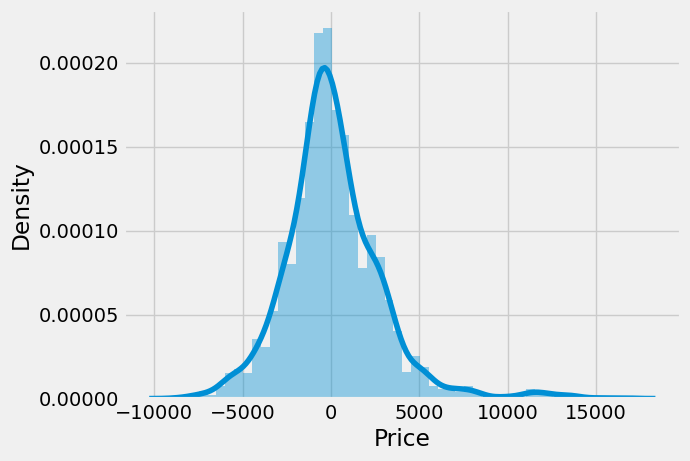

In [447]:
predict(Lasso(max_iter=100000,alpha=.5,selection='random'))

# Ridge Algorithm

Training score : 0.6374292885453725
predictions are: 
 [ 7379.30050533  9655.0541691  12690.81636852 ... 10622.78295044
  7887.48011171  5882.97961021]


r2 score: 0.6000945819897447
MAE: 1970.5295742834548
MSE: 7751951.614549361
RMSE: 2784.2326796712523


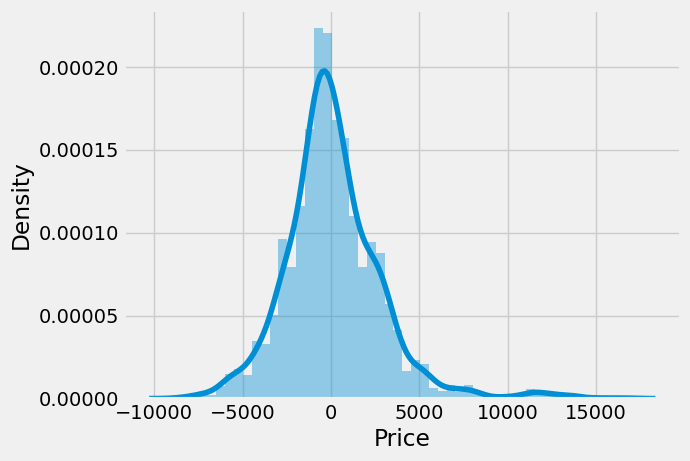

In [449]:
predict(Ridge(solver='saga',alpha=.9 ,  max_iter=320))

# K-Neighbors Algorithm

Training score : 0.9657272694743626
predictions are: 
 [ 6351.99415921  9452.50551823 12681.         ... 11736.19538101
  7490.40637458  6024.56332116]


r2 score: 0.5675016959424379
MAE: 1887.9257546812928
MSE: 8383747.194800199
RMSE: 2895.4701163714676


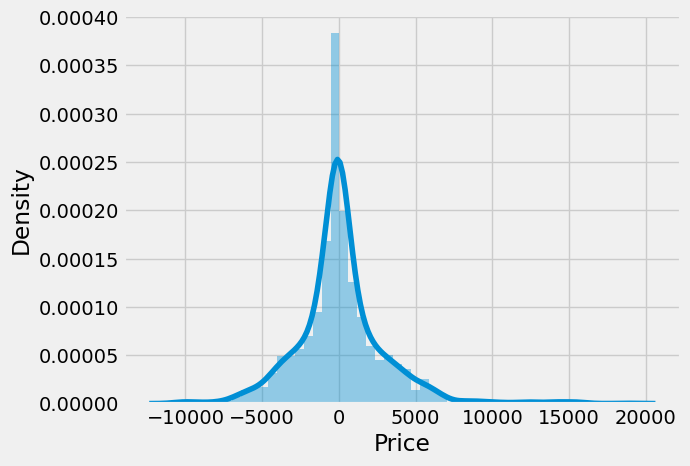

In [451]:
predict(KNeighborsRegressor(n_neighbors=3,
   
    weights='distance',
    algorithm='ball_tree',
    leaf_size=40,
    p=4,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,))